In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# parameters
theta = 2
beta = 0.95
alpha = 0.3

In [31]:
# steady-state values
k_s = ((1 / beta - 1) / alpha) ** (1 / (alpha - 1))
c_s = k_s**alpha

In [33]:
#initial conditions
k_0 = float(input('k_0 = '))

k_0 =  0.35


In [35]:
# resolving IVPs
tol = 1e-3
c_l = 0
c_h = k_0**alpha
c_0 = (c_l + c_h) / 2
X0 = np.array([c_0, k_0])

In [37]:
iter = 1
crit = 1

maxit = 500


In [43]:
while abs(crit) >= tol:
    print(X0)
    dd = np.array([0.0, 0.0])
    X = X0.reshape(1, -1)
    i = 0
    while np.min(dd) >= 0:
        dd[1] = (X0[1] ** alpha + X0[1] - X0[0]) - X0[1]  # k_(t+1) - k_t
        dd[0] = (
            beta ** (1 / theta) * (1 + alpha * (X0[1] + dd[1]) ** (alpha - 1)) ** (1 / theta) * X0[0] - X0[0]
        )  # c_(t+1) - c_t
        X0 = X0 + dd
        X = np.vstack((X, X0))  # 将新值添加到 X 中
        i += 1

    crit = X[-1, 0] - c_s
    print(crit)

    if dd[0] < 0:
        c_l = c_0
    else:
        c_h = c_0

    c_0 = (c_l + c_h) / 2
    X0 = np.array([c_0, k_0])
    iter += 1

    if iter > maxit:
        break

print(f"Convergence after {iter} iterations")

[0.36491391 0.35      ]
-1.5340831928203302
[0.54737086 0.35      ]
-0.8597636142785392
[0.45614239 0.35      ]
-1.2539580775125847
[0.50175663 0.35      ]
-0.8831021283128364
[0.52456374 0.35      ]
-0.7804576735431992
[0.51316019 0.35      ]
-0.401428132724049
[0.50745841 0.35      ]
-0.7406791002736937
[0.5103093 0.35     ]
-0.5917709180585398
[0.51173474 0.35      ]
-0.39418093357693107
[0.51244746 0.35      ]
-0.2952234414785806
[0.5120911 0.35     ]
-0.12702162720535348
[0.51191292 0.35      ]
-0.3254102236201888
[0.51200201 0.35      ]
-0.26411811627016757
[0.51204656 0.35      ]
-0.2057005191437684
[0.51206883 0.35      ]
-0.13778479544822164
[0.51207997 0.35      ]
-0.08953147657191796
[0.5120744 0.35     ]
-0.08463813592693059
[0.51207718 0.35      ]
-0.06788160071165539
[0.51207579 0.35      ]
-0.037177066090593236
[0.51207509 0.35      ]
-0.06600700191479048
[0.51207544 0.35      ]
-0.04661031307803176
[0.51207561 0.35      ]
-0.021123726544086896
[0.51207553 0.35      ]
-0

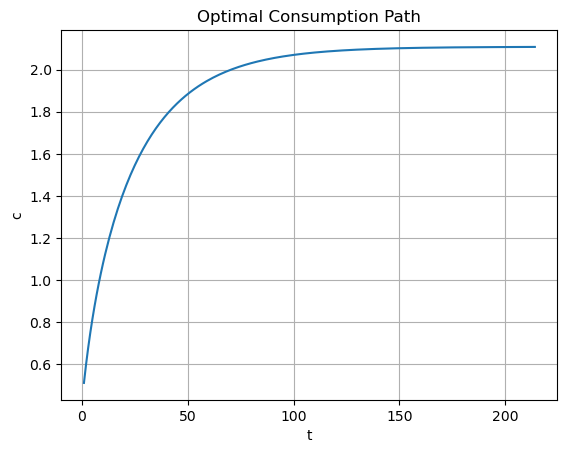

In [45]:
# 提取结果
x1 = X[:, 0]
x2 = X[:, 1]
x3 = x1 / x2

t = np.arange(1, len(x1)+1)

# 绘图 1
plt.figure()
plt.plot(t, x1)
plt.grid(True)
plt.title("Optimal Consumption Path")
plt.xlabel("t")
plt.ylabel("c")
plt.show()

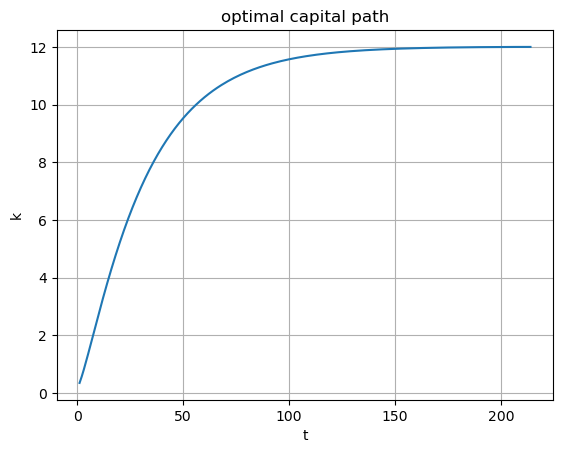

In [49]:
# 绘图 2
plt.figure()
plt.plot(t, x2)
plt.grid(True)
plt.title("optimal capital path")
plt.xlabel("t")
plt.ylabel("k")
plt.show()

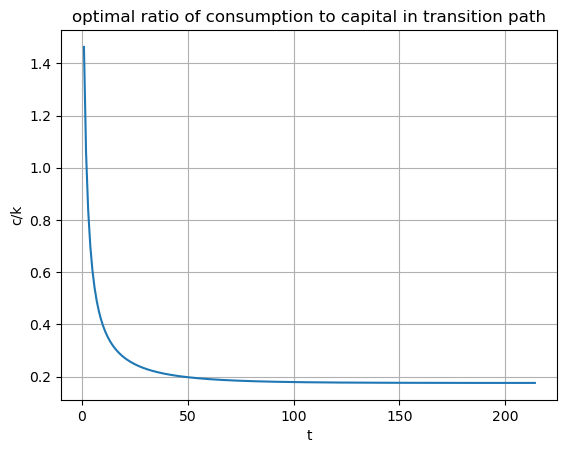

In [51]:
# 绘图 3
plt.figure()
plt.plot(t, x3)
plt.grid(True)
plt.title("optimal ratio of consumption to capital in transition path")
plt.xlabel("t")
plt.ylabel("c/k")
plt.show()